# Exploratory Data Analysis
In this section, we’ll dive into the 3D Printer Dataset to uncover insights and patterns that can help mechanical engineers. We’ll start by checking for missing and duplicated values to ensure the data is clean and ready for analysis.

Next, we’ll take a closer look at the data by summarizing its univariate descriptive statistics, including location, spread, flatness, skew, and proportion. This will give us a better understanding of the overall distribution of the data.

We’ll then explore the bivariate relationship between predictor and response variables to see how they interact with each other. We’ll also check for multicollinearity among predictors to ensure our analysis is accurate.

At the end of our exploration, we’ll wrap up our findings and provide recommendations for further analysis

## About the Dataset
The 3D Printer Dataset for Mechanical Engineers is available on Kaggle and was created by Ahmet Okudan, a Senior Engineer at Numesys. The dataset comes from research by TR/Selcuk University Mechanical Engineering department. The aim of the study is to determine how much of the adjustment parameters in 3D printers affect the print quality, accuracy, and strength.

The dataset contains nine setting parameters: Layer Height (mm), Wall Thickness (mm), Infill Density (%), Infill Pattern, Nozzle Temperature (Cº), Bed Temperature (Cº), Print Speed (mm/s), Material, and Fan Speed (%). It also contains three measured output parameters: Roughness (µm), Tension (ultimate) Strength (MPa), and Elongation (%).

This work is based on the Ultimaker S5 3-D printer settings and filaments. Material and strength tests were carried out on a Sincotec GMBH tester capable of pulling 20 kN. The dataset can be used to estimate which material is used from the input and output parameters using the kNN and DNN algorithms.

### Predictor Variables:

- **Layer Height** (mm): The thickness of each layer of material deposited by the 3D printer.
- **Wall Thickness** (mm): The thickness of the walls of the printed object.
- **Infill Density** (%): The percentage of the interior volume of the printed object that is filled with material.
- **Infill Pattern**: The pattern used to fill the interior volume of the printed object.
- **Nozzle Temperature** (Cº): The temperature of the 3D printer’s nozzle.
- **Bed Temperature** (Cº): The temperature of the 3D printer’s build platform.
- **Print Speed** (mm/s): The speed at which the 3D printer deposits material.
- **Material**: The type of material used by the 3D printer.
- **Fan Speed** (%): The speed of the 3D printer’s cooling fan.

### Response Variables:

- **Roughness** (µm): A measure of the surface roughness of the printed object.
- **Tension Strength** (MPa): A measure of the ultimate tensile strength of the printed object.
- **Elongation** (%): A measure of the elongation or deformation of the printed object when subjected to tensile stress.

These variables provide valuable information about the settings and performance of 3D printers, and can be used to explore the relationships between different parameters and their effects on print quality, accuracy, and strength.

## Tools for Data Exploration
Before we dive into our exploratory data analysis, let’s take a moment to review the tools we’ll be using.

- **Pandas**: This powerful library is essential for manipulating and analyzing data in Python. We’ll use it to work with our data in a tabular format, making it easy to clean, transform, and summarize.
- **Seaborn**: When it comes to visualizing data, Seaborn is a go-to tool for creating beautiful and informative plots. We’ll use it to explore the relationships between variables and uncover patterns in our data.
- **SciPy Stats**: For more advanced statistical calculations, we’ll turn to the SciPy Stats module. This library provides a wide range of statistical functions and tests that can help us better understand our data.

## Loading the Data
Now that we’ve reviewed the variables in the 3D Printer Dataset for Mechanical Engineers, it’s time to start exploring the data. To do this, we’ll first load the dataset into a Pandas DataFrame. This will allow us to easily manipulate and analyze the data using the powerful tools provided by the Pandas library.

Once we have the data loaded, we’ll split it into two parts: features and targets. The features are the predictor variables that we’ll use to make predictions about the response variables, which are our targets. By separating the data in this way, we can more easily explore the relationships between the different variables and build predictive models.

In [1]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

# Ignore FutureWarnings
warnings.filterwarnings(action="ignore", category=FutureWarning)

In [2]:
dataset = pd.read_csv("dataset/data.csv")
dataset.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [3]:
print(f"Number of Attributes: {dataset.shape[1]}-columns.\nNumber of Observations: {dataset.shape[0]}-rows.")

Number of Attributes: 12-columns.
Number of Observations: 50-rows.


In [4]:
# Split the dataset into features and targets
feature_vars = dataset.iloc[:, 0:9]
target_vars  = dataset.iloc[:, 9:]

# Store the names of features and target variables
feature_var_names = feature_vars.columns
target_var_names  = target_vars.columns

# Separate categorical and numerical features
feature_vars__categorical = feature_vars.select_dtypes("object")
feature_vars__numerical   = feature_vars.select_dtypes("number")

# Separate the
feature_var_names__categorical = feature_vars__categorical.columns
feature_var_names__numerical   = feature_vars__numerical.columns

## Checking of Missing Data and Duplicate Data
With our 3D Printer Dataset loaded into a Pandas DataFrame, we can now start exploring the data. One of the first things we’ll want to do is check for missing and duplicate data. This is an important step in any data analysis, as missing or duplicate data can affect the accuracy of our results.

To count the number of missing values in our dataset, we can use the `isna()` and `sum()` methods of the Pandas DataFrame object. This will tell us how many missing values there are in each column of our dataset.

Similarly, we can count the number of duplicate rows in our dataset by using the `duplicated()` and `sum()` methods of the DataFrame object. This will tell us how many rows in our dataset are exact duplicates of other rows.

In [5]:
dataset.isna().sum()

layer_height          0
wall_thickness        0
infill_density        0
infill_pattern        0
nozzle_temperature    0
bed_temperature       0
print_speed           0
material              0
fan_speed             0
roughness             0
tension_strenght      0
elongation            0
dtype: int64

> Based on above results, there was no missing data for all of the columns of the dataset.|

In [6]:
# Note: the subset=feature_var_names parameter will count all duplicated combination of machine settings.
print(f"Number of duplicated machine setting combinations: {dataset.duplicated(subset=feature_var_names).sum()}")

Number of duplicated machine setting combinations: 0


> Based on above results, there were no duplicated machine settings.

## Univariate Descriptive Statistics
Now that we’ve ensured that our 3D Printer Dataset is free of missing and duplicate data, we can start exploring its univariate descriptive statistics. This will give us a better understanding of the overall distribution of the data and help us identify any patterns or trends.

For numerical variables, we’ll calculate the mean, sample standard deviation, skewness, and kurtosis. These statistics will provide us with information about the central tendency, spread, and shape of the data.

For categorical variables, we’ll calculate their proportion. This will tell us how frequently each category appears in the data.

By exploring the univariate descriptive statistics of our dataset, we can gain valuable insights into the characteristics of the data and prepare for further analysis.

In [59]:
def tabulate_numeric_descriptive_stat(df):
    descriptive_stats = pd.DataFrame(columns=[
        "Feature Name",
        "Minimum",
        "Median",
        "Maximum",
        "Mean",
        "Sample Std. Dev.",
        "Skewness",
        "Kurtosis",
    ])

    for feature_name in df.columns:
        descriptive_stats.loc[len(descriptive_stats)] = [
            feature_name,
            df[feature_name].min(),
            df[feature_name].median(),
            df[feature_name].max(),
            df[feature_name].mean(),
            df[feature_name].std(),
            stats.skew(df[feature_name].to_numpy()),
            stats.kurtosis(df[feature_name].to_numpy())
        ]

    return descriptive_stats

def visualize_numeric_vars(df, nrows,ncols):
    plt.figure(figsize=(16,9))
    for i in range(df.shape[1]):
        plt.subplot(nrows,ncols,i+1)
        sns.histplot(df.iloc[:,i])
        plt.tight_layout()

def visualize_categorical_vars(df):
    plt.figure(figsize=(16,9))
    for i in range(df.shape[1]):
        plt.subplot(1,2,i+1)
        sns.histplot(df.iloc[:,i])

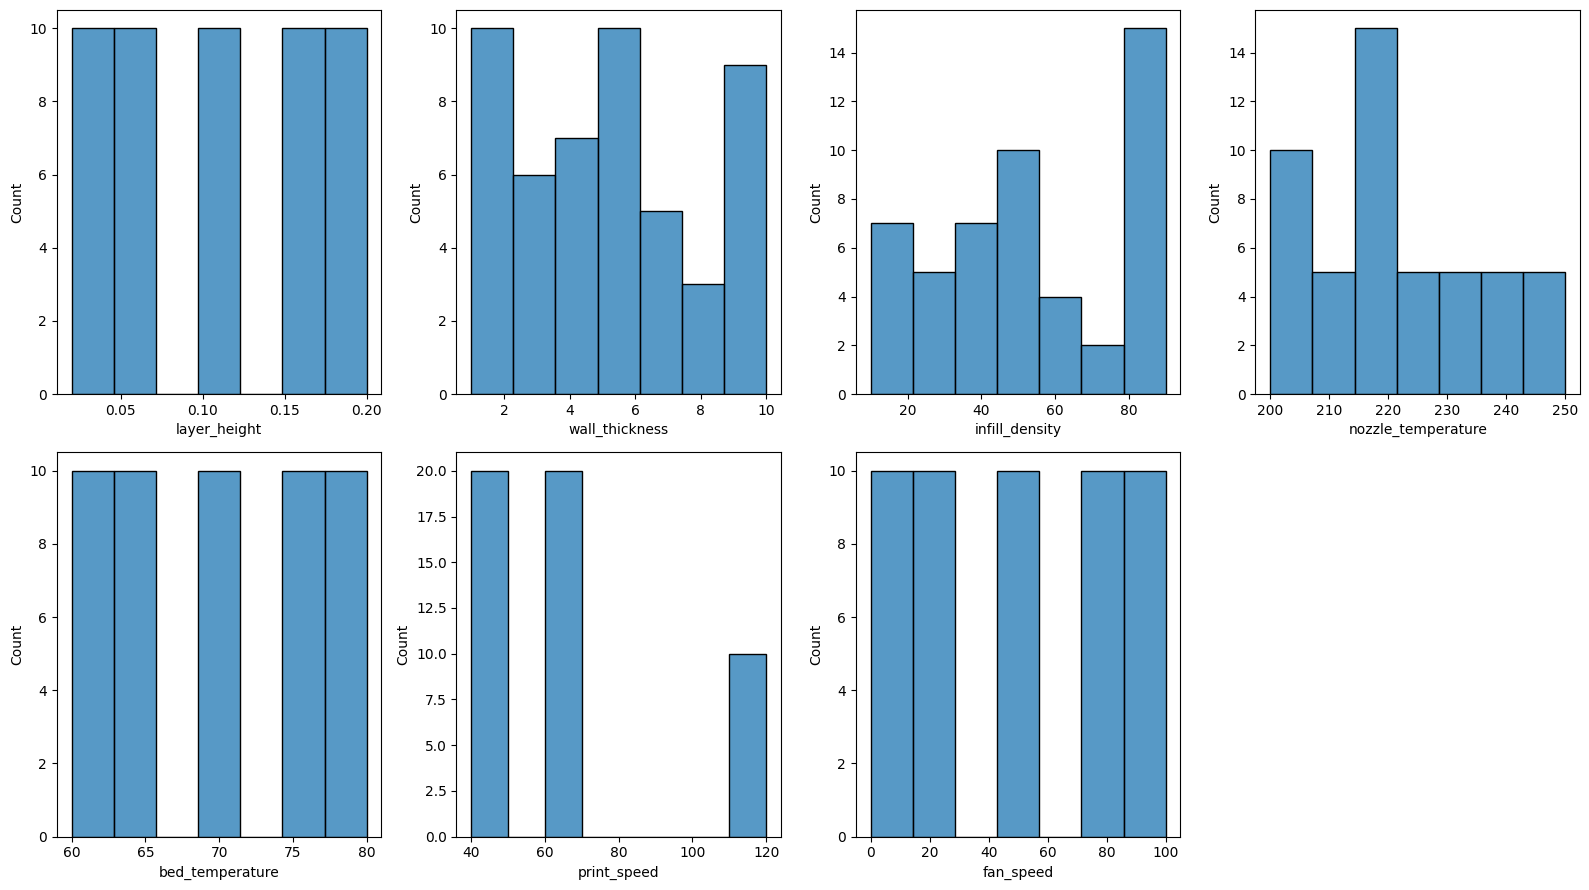

In [60]:
visualize_numeric_vars(feature_vars__numerical,nrows=2,ncols=4)

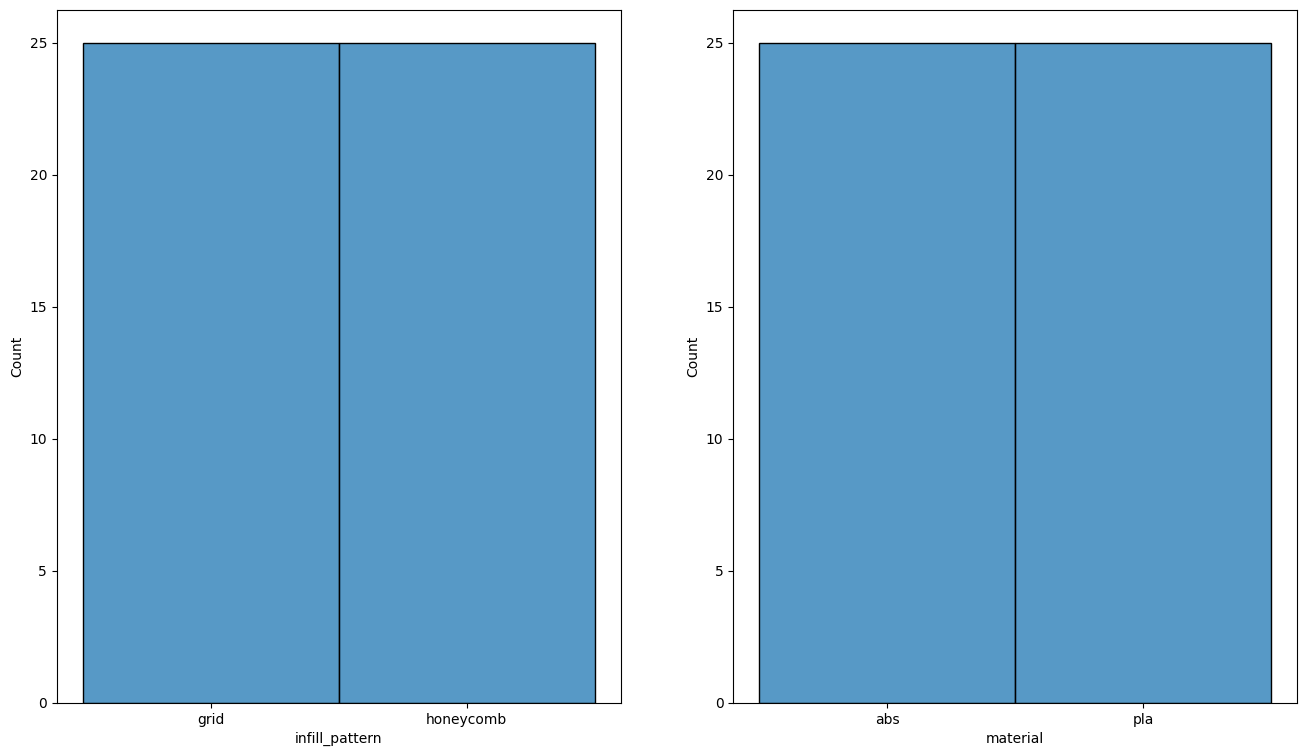

In [61]:
visualize_categorical_vars(feature_vars__categorical)

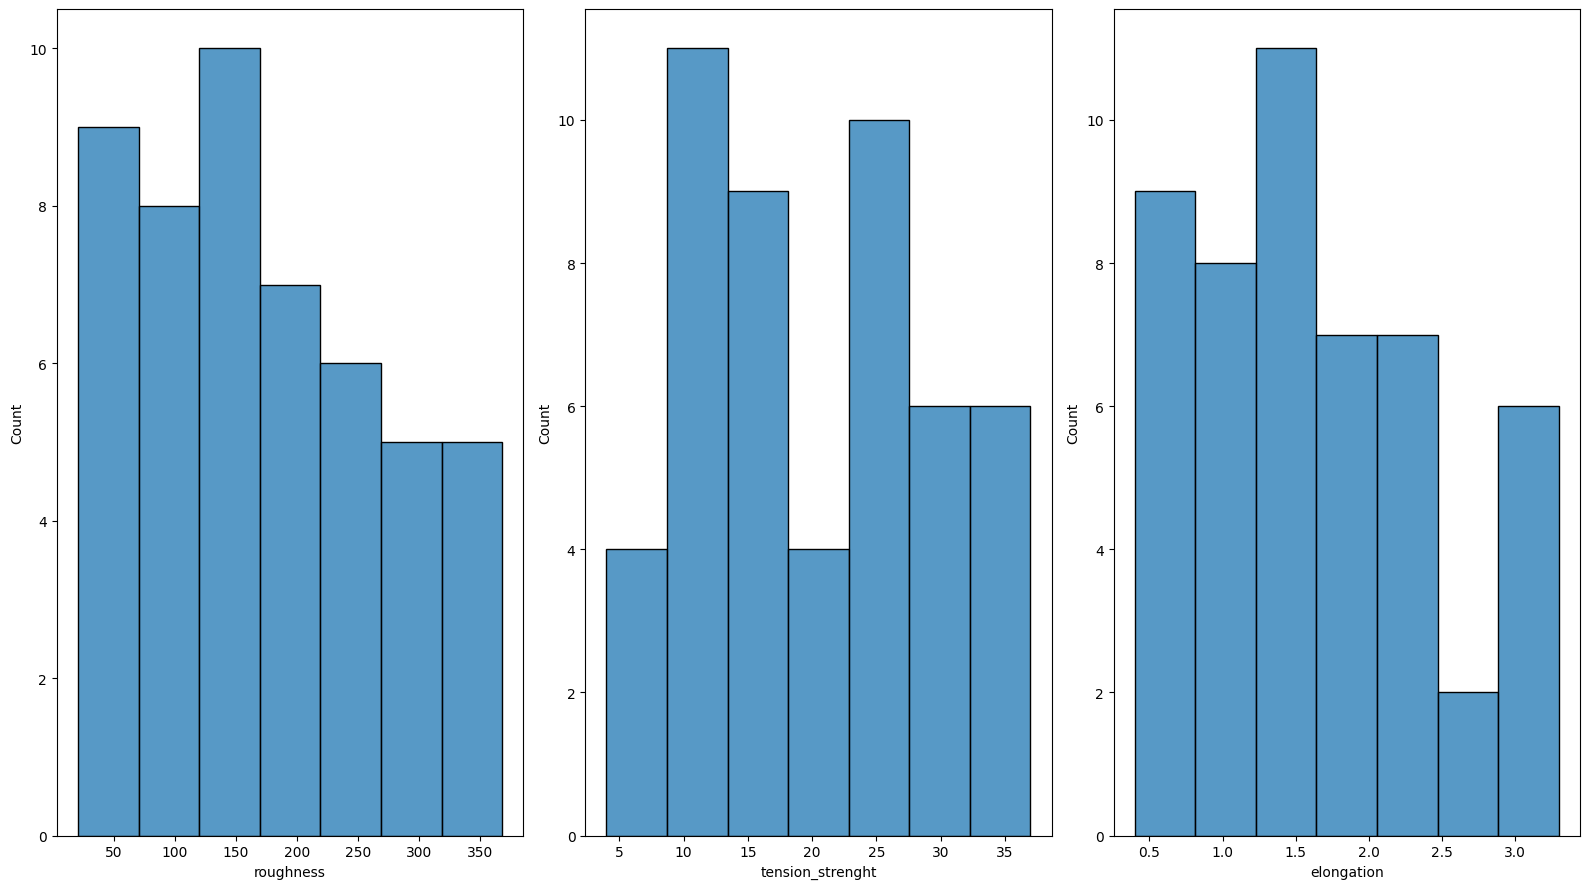

In [56]:
visualize_numeric_vars(target_vars,nrows=1,ncols=3)

In [9]:
tabulate_numeric_descriptive_stat(feature_vars__numerical)

,Feature Name,Minimum,Median,Maximum,Mean,Sample Std. Dev.,Skewness,Kurtosis
0,layer_height,0.02,0.1,0.2,0.106,0.064397,0.140622,-1.292544
1,wall_thickness,1.00,5.0,10.0,5.220,2.922747,0.171913,-1.093677
2,infill_density,10.00,50.0,90.0,53.400,25.363480,-0.076427,-1.053634
3,nozzle_temperature,200.00,220.0,250.0,221.500,14.820353,0.440308,-0.648877
4,bed_temperature,60.00,70.0,80.0,70.000,7.142857,0.000000,-1.300000
5,print_speed,40.00,60.0,120.0,64.000,29.692300,1.164264,-0.187243
6,fan_speed,0.00,50.0,100.0,50.000,35.714286,0.000000,-1.300000


In [10]:
tabulate_numeric_descriptive_stat(target_vars)

,Feature Name,Minimum,Median,Maximum,Mean,Sample Std. Dev.,Skewness,Kurtosis
0,roughness,21.0,165.50,368.0,170.580,99.034129,0.299318,-0.899352
1,tension_strenght,4.0,19.00,37.0,20.080,8.925634,0.079585,-1.153127
2,elongation,0.4,1.55,3.3,1.672,0.788188,0.492344,-0.650802


In [11]:
feature_vars__categorical.groupby(["infill_pattern"]).count()

,material
infill_pattern,
grid,25
honeycomb,25


> Based on above results, `infill_pattern` has a balanced proportion.

In [12]:
feature_vars__categorical.groupby(["material"]).count()

,infill_pattern
material,
abs,25
pla,25


> Based on above results, `material` has a balanced proportion.

<Axes: >

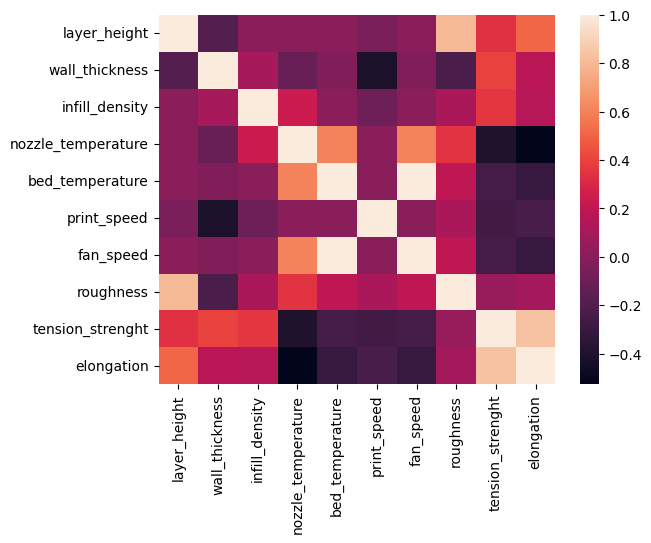

In [62]:
sns.heatmap(data=dataset.corr())